In [11]:


# Execute this first 
#
#  * trigger notebook styling
#  * check if notebook had been modified since its distribution
# 
# Note: executing any cells before this modifies the notebook.
# 

import os

# Add Homebrew's bin folder to the system path used by Jupyter
os.environ['PATH'] += ":/opt/homebrew/bin"

# Test if it works now
!gmx -version

#check_notebook()

                     :-) GROMACS - gmx, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx -version

GROMACS version:     2025.4-Homebrew
Precision:           mixed
Memory model:        64 bit
MPI library:         thread_mpi
OpenMP support:      enabled (GMX_OPENMP_MAX_THREADS = 128)
GPU support:         disabled
SIMD instructions:   ARM_NEON_ASIMD
CPU FFT library:     fftw-3.3.10
GPU FFT library:     none
Multi-GPU FFT:       none
TNG support:         enabled
Hwloc support:       disabled
Tracing support:     disabled
C compiler:          /opt/homebrew/opt/gcc/bin/gcc-15
C compiler flags:    -fexcess-precision=fast -funroll-all-loops -Wno-missing-field-initializers -O3 -DNDEBUG
C++ compiler:        /opt/homebrew/opt/gcc/bin/g++-15
C++ compiler flags:  -fexcess-precision=fast -funroll-all-

In [23]:
%pip install nglview pandas mdtraj numpy matplotlib
import nglview as ng
import pandas as pd
import mdtraj as md
import numpy as np
import matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
%cd ~/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
!ls

/Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
DOS.py            SetupDOS          methaneDOS.py     peaks.py
HiRESpeaks.py     convert_dos.py    methane_bonds.py  production.mdp
Methane94K.ipynb  em.mdp            npt.mdp           topol.top
OLD_methaneDOS.py methane.pdb       nvt.mdp


In [9]:
# Load and view the .pdb or .gro file with the following lines
view = ng.show_structure_file("methane.pdb")
view

NGLWidget()

In [12]:
# Create larger box to grow simulation
!gmx editconf -f methane.pdb -o box.gro -box 2.8 2.8 2.8 -noc

# Add the Methane Molecules to the larger box
!gmx insert-molecules -ci methane.pdb -nmol 200 -box 2.8 2.8 2.8 -o methane.gro -seed 12345 -try 10000

                :-) GROMACS - gmx editconf, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx editconf -f methane.pdb -o box.gro -box 2.8 2.8 2.8 -noc

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5 atoms
No velocities found
new box vectors :  2.800  2.800  2.800 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  :  21.95               (nm^3)

GROMACS reminds you: "Same sex marriage is not a gay privilege, it's equal rights. Privilege would be something like gay people not paying taxes. Like churches don't." (Ricky Gervais)

            :-) GROMACS - gmx insert-molecules, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Work

In [13]:
# View the system
view = ng.show_structure_file("methane.gro")
view.add_representation(repr_type='ball+stick', selection='SOL')
view.camera='orthographic'
view

NGLWidget()

In [17]:
#Energy Minimization
!gmx grompp -f em.mdp -c methane.gro -p topol.top -o em.tpr
!gmx mdrun -deffnm em -ntmpi 1 -ntomp 1

                 :-) GROMACS - gmx grompp, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx grompp -f em.mdp -c methane.gro -p topol.top -o em.tpr

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to 790619495

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'
Analysing residue names:
There are:   200      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group rest is 2997.00
The integrator does not provide a ensemble temperature, there is no system ensemble temperature

The largest distance between excluded atoms

In [18]:
#Analyze results of EM
!printf "Potential\n0\n" | gmx energy -f em.edr -o potential.xvg -xvg none

                 :-) GROMACS - gmx energy, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx energy -f em.edr -o potential.xvg -xvg none

Opened em.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Pres.-DC      
  9  Pressure        10  Vir-XX          11  Vir-XY          12  Vir-XZ        
 13  Vir-YX          14  Vir-YY          15  Vir-YZ          16  Vir-ZX        
 17  Vir-ZY          18  Vir-ZZ          19  Pres-XX    

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='step'>

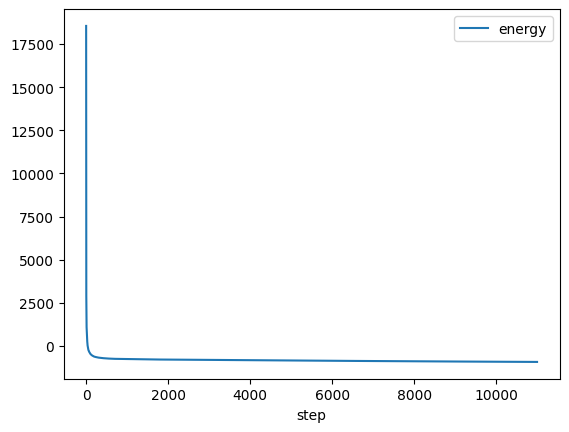

In [24]:
# Print graph
df = pd.read_csv('potential.xvg', sep='\\s+', header=None, names=['step','energy'])
df.plot('step')

In [26]:
# Temperature EQ T=94K
!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr 
!gmx mdrun -ntmpi 1 -ntomp 6 -v -deffnm nvt

                 :-) GROMACS - gmx grompp, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

Setting the LD random seed to -1893859365

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'

Setting gen_seed to -743784459

Velocities were taken from a Maxwell distribution at 150 K
Analysing residue names:
There are:   200      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group System is 2997.00

The largest distance between excluded atoms is 0.179 nm between atom 893 a

In [27]:
# Analyze Temp run
!echo "Temperature" | gmx energy -f nvt.edr -o temperature.xvg -xvg none -b 20

                 :-) GROMACS - gmx energy, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx energy -f nvt.edr -o temperature.xvg -xvg none -b 20

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Vir-XX          15  Vir-XY          16  Vir-XZ        
 17  Vir-YX          18  Vir-YY          19  V

<Axes: xlabel='time'>

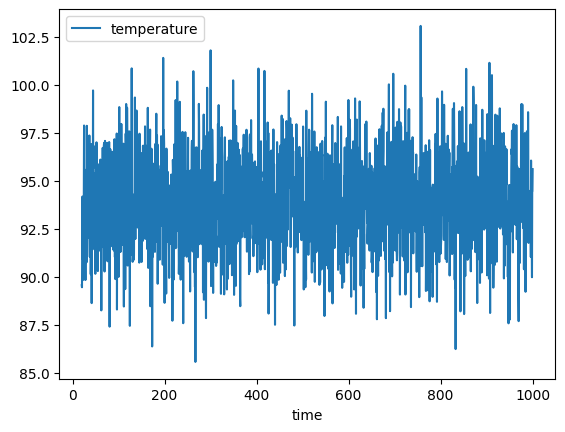

In [28]:
# Plot Temp data
df = pd.read_csv('temperature.xvg', sep='\\s+', header=None, names=['time','temperature'])
df.plot('time')
#!echo "Temperature" | gmx energy -f nvt.edr -o temperature.xvg -b 20
#!xmgrace temperature.xvg

In [31]:
# Pressure EQ P = 1.5 bars
!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt1.tpr -maxwarn 1
!gmx mdrun -ntmpi 1 -ntomp 13 -v -deffnm npt1

                 :-) GROMACS - gmx grompp, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt1.tpr -maxwarn 1

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to 2001903087

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'

Taking velocities from 'nvt.gro'
Analysing residue names:
There are:   200      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group System is 2997.00

The largest distance between excluded atoms is 0.189 nm between atom 5

In [32]:
# Analyze Pressure Data
!echo "Pressure" | gmx energy -f npt1.edr -o pressure.xvg -xvg none

                 :-) GROMACS - gmx energy, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx energy -f npt1.edr -o pressure.xvg -xvg none

Opened npt1.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume          18  Density         19  pV      

<Axes: xlabel='time'>

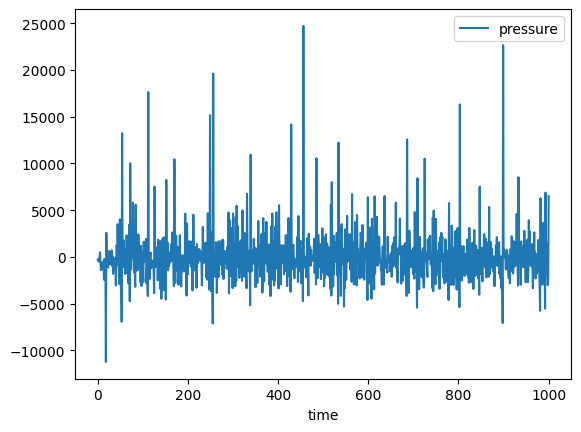

In [33]:
df = pd.read_csv('pressure.xvg', sep='\\s+', header=None, names=['time','pressure'])
df.plot('time')

In [ ]:
#!echo "Pressure" | gmx energy -f npt.edr -o pressure.xvg
#!xmgrace pressure.xvg

In [34]:
# Look at density of system
!echo "Density" | gmx energy -f npt1.edr -o density1.xvg -xvg none

                 :-) GROMACS - gmx energy, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx energy -f npt1.edr -o density1.xvg -xvg none

Opened npt1.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume          18  Density         19  pV      

<Axes: xlabel='time'>

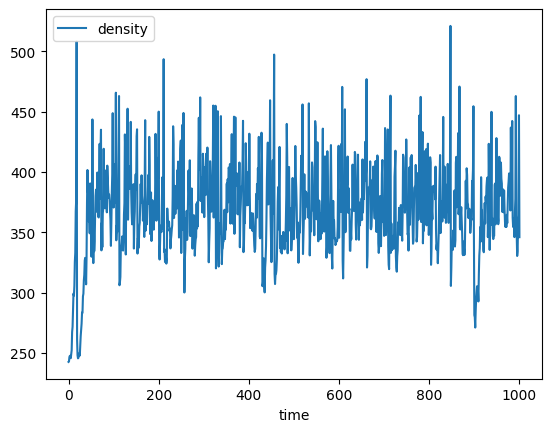

In [35]:
#Plot density
df = pd.read_csv('density1.xvg', sep='\\s+', header=None, names=['time','density'])
df.plot('time')

In [36]:
!tail -1 npt1.gro

   2.48781   2.48781   2.48781


In [39]:
#!gmx editconf -f npt1.gro -o npt1_expanded.gro -box 2.2 2.2 2.2 -c

In [40]:
# Pressure EQ Stage 2
!gmx grompp -f npt.mdp -c npt1.gro -p topol.top -o npt2.tpr -maxwarn 1
!gmx mdrun -ntmpi 1 -ntomp 6 -v -deffnm npt2

                 :-) GROMACS - gmx grompp, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx grompp -f npt.mdp -c npt1.gro -p topol.top -o npt2.tpr -maxwarn 1

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -562036763

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'

Taking velocities from 'npt1.gro'
Analysing residue names:
There are:   200      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group System is 2997.00

The largest distance between excluded atoms is 0.185 nm between atom 212 and 213

Determin

                 :-) GROMACS - gmx energy, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx energy -f npt2.edr -o pressure2.xvg -xvg none

Opened npt2.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume          18  Density         19  pV     

<Axes: xlabel='time'>

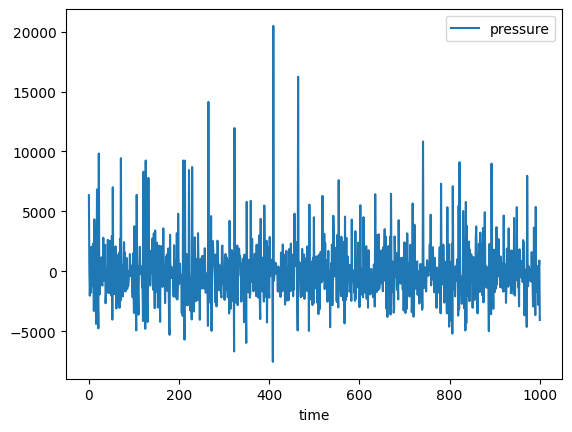

In [41]:
# Analyze Pressure Data
!echo "Pressure" | gmx energy -f npt2.edr -o pressure2.xvg -xvg none

df = pd.read_csv('pressure2.xvg', sep='\\s+', header=None, names=['time','pressure'])
df.plot('time')

                 :-) GROMACS - gmx energy, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx energy -f npt2.edr -o density2.xvg -xvg none

Opened npt2.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume          18  Density         19  pV      

<Axes: xlabel='time'>

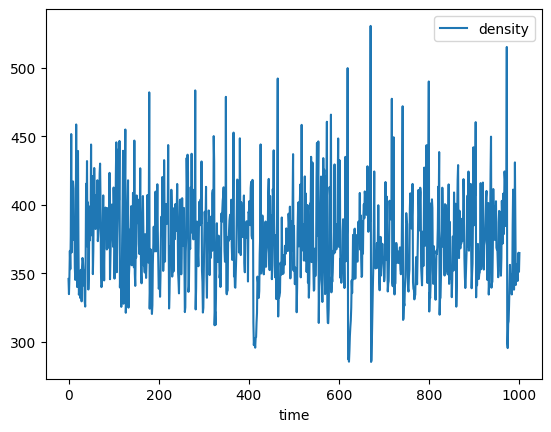

In [42]:
# Look at density of system
!echo "Density" | gmx energy -f npt2.edr -o density2.xvg -xvg none

#Plot density
df = pd.read_csv('density2.xvg', sep='\\s+', header=None, names=['time','density'])
df.plot('time')

In [44]:
#Production Run
!gmx grompp -f production.mdp -c npt1.gro -t npt1.cpt -p topol.top -o md.tpr -maxwarn 1
!gmx mdrun -ntmpi 1 -ntomp 8 -pin on -v -deffnm md

                 :-) GROMACS - gmx grompp, 2025.4-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2025.4/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2025.4
Working dir:  /Users/mackenziehenley/Programming/DraGNS/Repo_Full/Methane/94K/BaseFiles
Command line:
  gmx grompp -f production.mdp -c npt1.gro -t npt1.cpt -p topol.top -o md.tpr -maxwarn 1

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -134283273

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'

Taking velocities from 'npt1.gro'
Analysing residue names:
There are:   200      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group System is 2997.00

The largest distance between excluded atoms is 0.185 nm between atom 212 

In [ ]:
import os
print("md.trr exists:", os.path.exists("md.trr"))
print("methane.gro exists:", os.path.exists("methane.gro"))

In [ ]:
import mdtraj as md
import os

# Check files exist
print("md.trr exists:", os.path.exists("md.trr"))
print("methane.gro exists:", os.path.exists("methane.gro"))

# Load and check trajectory
try:
    traj = md.load_trr("md.trr", top="methane.gro", stride=10)
    print(f"Loaded trajectory: {traj.n_frames} frames, {traj.n_atoms} atoms")
    print(f"Time range: {traj.time[0]:.1f} to {traj.time[-1]:.1f} ps")
    
    # Try creating view
    view = ng.show_mdtraj(traj)
    print(f"View created: {type(view)}")
    
    # Display
    view
except Exception as e:
    print(f"Error: {e}")

In [ ]:
import nglview as ng
import mdtraj as md

# Enable widget rendering
ng.default_view_backend = 'notebook'  # or 'ipywidgets'
# Load trajectory
traj = md.load_trr("md.trr", top="md.gro")
view = ng.show_mdtraj(traj)
# Display
view